### Autores:  
Blanco García, Gabriel: gabriel.blanco@cunef.edu  
Ferrín Meilán, Michelle: michelle.ferrin@cunef.edu

## Colegio Universitario de Estudios Financieros
### Máster en Data Science para Finanzas
Madrid, diciembre de 2020

# Selección del modelo ganador

En esta sección se cargan todos los modelos entrenados, se comparan utilziando distintas métricas, y se selecciona el mejor modelo. A dicho modelo se le optimizarán los hiperparámetros

In [25]:
# Manipulacion
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas 
import scikitplot as skplt # gráfico de curvas ROC

from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix # Matriz confusion
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Funciones de lectura y preprocesado
%run ../src/lectura_y_preprocesado.ipynb

### Carga de datos

Primero cargamos los modelos previamente entrenados

Cargamos los datos de entrenamiento y los de test

In [26]:
X_train = pd.read_csv('../data/train/X_train.csv', engine='python')
y_train = pd.read_csv('../data/train/y_train.csv', engine='python')

X_test = pd.read_csv('../data/test/X_test.csv', engine='python')
y_test = pd.read_csv('../data/test/y_test.csv', engine='python')

Cargamos todos los modelos

In [34]:
# Definimos una función para abreviar el proceso
def cargar_modelo(path):
    '''
    Esta función solo toma como argumento la ruta 
    a la ubicación del modelo.
    '''
    return pickle.load(open(path, 'rb'))

In [28]:
modelo_base = cargar_modelo('../models/trained_models/modelo_base.sav')

In [29]:
regresion_logistica = cargar_modelo('../models/trained_models/logistic_regression.sav')

In [30]:
svm_radial = cargar_modelo('../models/trained_models/svm_radial.sav')

In [31]:
svm_lineal = cargar_modelo('../models/trained_models/SVM_Lineal_Final.sav')

In [32]:
random_forest = cargar_modelo('../models/trained_models/Random_Forest.sav')

In [33]:
XGBoost = cargar_modelo('../models/trained_models/XGBoost.sav')

# Comparación de modelos: curvas ROC y matrices de  confusión

Para comparar los modelos, calculamos su precisión, graficamos la curva ROC y obtenemos su matriz de confusión normalizada. Utilzamos la matriz para explorar la distribucion de los errores, puesto que evaluar solo los modelos en términos de accuracy sería un error

Primero se calcula para cada modelo las tres métricas mencioandas y __no se comentan ni se evalúan hasta el final__, donde se construye una tabla con las métricas de cada modelo, se selecciona al ganador y se justifica la decisión.

### Curva ROC y relación con la matriz de confusión

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Sensitivity_and_specificity.svg/350px-Sensitivity_and_specificity.svg.png' style="width:450px;height:700px" align = "right">
La matriz de confusión captura las tasas de falsos positivos y negativos, y verdaderos positivos y negativos. Sin embargo, todos sus cálculos se deben al punto de corte que fijamos al predecir. Los algoritmos de Machine Learnging empleados devuelven probabilidades, y tienen asignado un umbral a partir del cual se clasifica como clase 1 o clase 0. La curva ROC es la representación gráfica de cómo varía la sensibilidad frente a la especificidad para los distintos umbrales, para los distitnos puntos de corte. 

- Tasa de verdaderos positivos: verdaderos positivos entre el total de verdaderos positivos y falsos negativos.  

- Tasa de falsos positivos: falsos positivos entre el total de falsos positivos y verdaderos negativos

Antes de calcular las métricas, definimos funciones para abreviar el proceso

Función para el accuracy

In [67]:
def accuracy(modelo):
    '''
    Solo toma como arumento el modelo del que se quiere
    calcular el accuracy. Es necesario que los objetos X_test e y_test 
    estén definidos previamente
    
    '''
    
    return modelo.score(X_test, y_test)

Función para las curvas ROC

In [21]:
def grafico_roc(modelo, titulo):
    '''
    Toma como argumentos el modelo y el título del gráfico. 
    Utiliza el modelo para sacar la predicción en términos de 
    probabilidad. Es necesario que los objetos X_test e y_test 
    hayan sido definidos fuera de la función previamente.
    
    '''
    
    # Se calcula la predicción en términos de probabilidad
    y_probabilidad = modelo.predict_proba(X_test)
    
    # Se realiza el gráfico 
    skplt.metrics.plot_roc(y_test, y_probabilidad, figsize=(12, 7))
    plt.title(titulo);

Función para las matrices de confusión

In [35]:
def plot_matriz_confusion(modelo, titulo):
    '''
    Toma como argumentos el modelo y el título del plot.
    Se calcula la predicción y la matriz de confusión, y se manipulan los datos
    de tal manera que se puedan representar en un heatmap 2x2, con los datos en valor
    absoluto y los datos normalizados. Es necesario que los objetos X_test e y_test hayan sido
    definidos previamente
    
    '''
    prediccion = modelo.predict(X_test) # la predicción
    
    confusion = confusion_matrix(y_test, prediccion) # la matriz de confusión
    
    # Definimos los elementos que van a ir dentro del gráfico: texto y número
    etiquetas = ['Verdaderos negativos', 'Falsos positivos', 'Falsos negativos', 'Verdaderos positivos']
    
    totales = ['{0:0.0f}'.format(value) for value in
                confusion.flatten()] # matriz 'plana'
    
    porcentuales = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)] # calcula el porcentaje 
    
    # Las etiquetas que iran dentro del plot
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(etiquetas, totales, porcentuales)]
    
    labels = np.asarray(labels).reshape(2,2)
    
    # Y ahora el plot
    plt.subplots(figsize=(10, 5))
    
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Greens')
    plt.title(titulo)
    plt.xlabel('Valor real')
    plt.ylabel('Valor estimado')

## Modelo base

Calculamos sus métricas para utilizarlo como referencia

### Accuracy 

In [68]:
accuracy(modelo_base)

0.7482231525654756

### Curva ROC y AUC

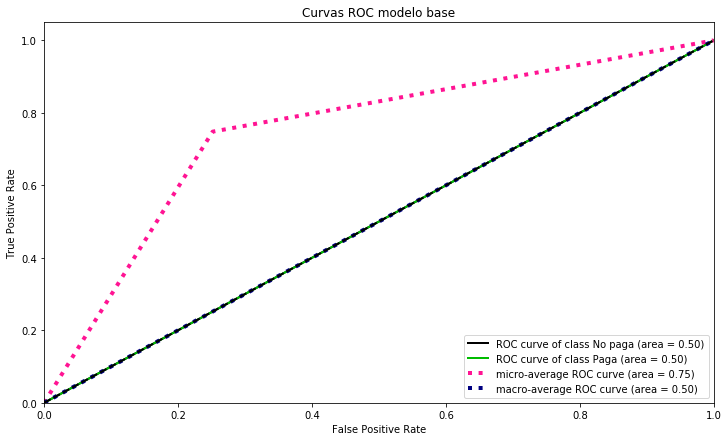

In [57]:
grafico_roc(modelo_base, 'Curvas ROC modelo base')

### Matriz de confusión normalizada

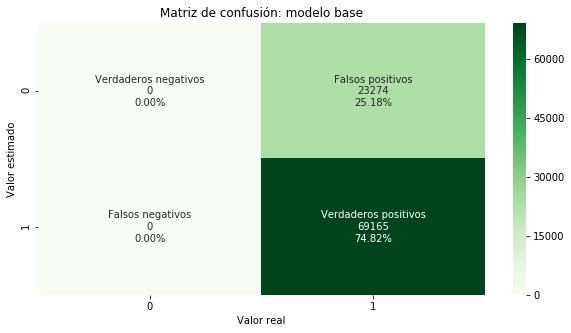

In [58]:
plot_matriz_confusion(modelo_base, 'Matriz de confusión: modelo base')

## Regresión logística 

### Accuracy 

In [69]:
accuracy(regresion_logistica)

0.7875355639935525

### Curvas ROC y AUC

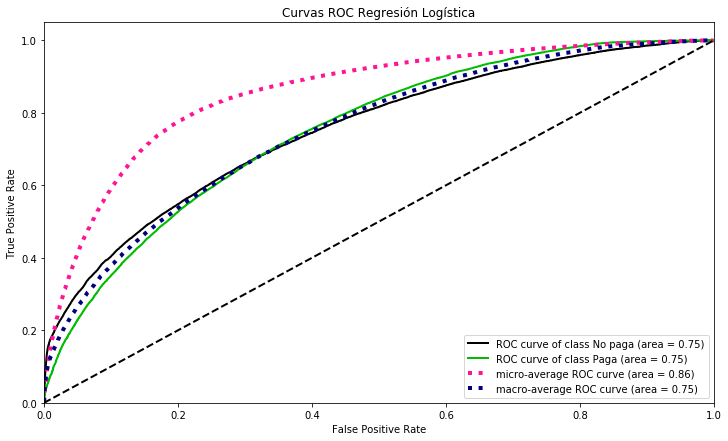

In [22]:
grafico_roc(regresion_logistica, 'Curvas ROC Regresión Logística')

### Matriz de confusión normalizada

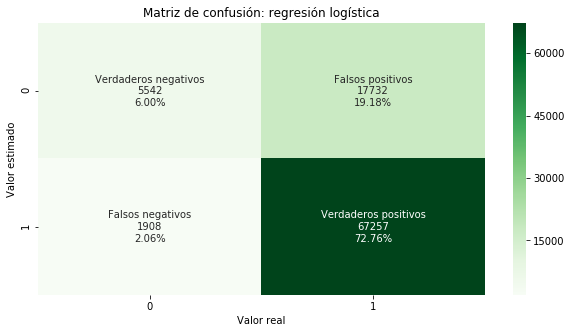

In [23]:
plot_matriz_confusion(regresion_logistica, 'Matriz de confusión: regresión logística')

Accuracy: 78.75%  
AUC: 0.75  
Tasa falsos positivos: 19.18%

## Support Vector Machines: kernel lineal y radial

No calculamos su AUC porque las funciones base de los Support Vector Machine de sklearn no permiten obtener la predicción en términos de probabilidad, y los modelos han sido entrenados con el argumento propability=False

###  Accuracy: kernel radial

In [70]:
accuracy(svm_radial)

0.6846893627148715

### Matriz de confusión normalizada: kernel radial

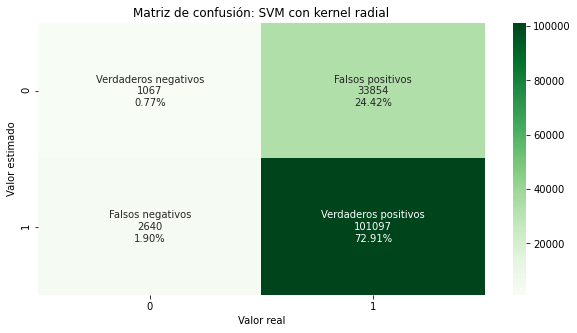

In [14]:
plot_matriz_confusion(svm_radial, 'Matriz de confusión: SVM con kernel radial')

### Accuracy: kernel lineal

In [71]:
accuracy(svm_lineal)

0.7867134001882322

### Matriz de confusión normalizada: kernel lineal

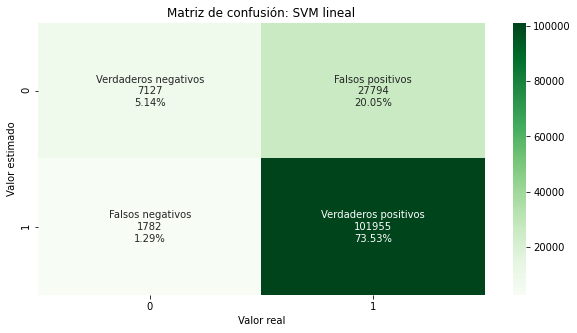

In [58]:
plot_matriz_confusion(svm_lineal, 'Matriz de confusión: SVM lineal')

Kernel radial:
Accuracy: 68.46%  
Tasa falsos positivos: 24.42%

Kernel lineal:
Accuracy: 78.67%  
Tasa falsos positvos: 20.05%

##  Random Forest

###  Accuracy 

In [72]:
accuracy(random_forest)

0.7785566698038706

### Curva ROC y AUC

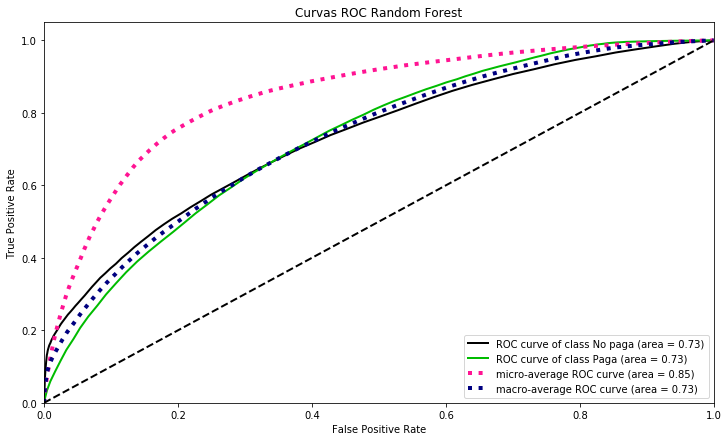

In [40]:
grafico_roc(random_forest, 'Curvas ROC Random Forest')

### Matriz de confusión normalizada

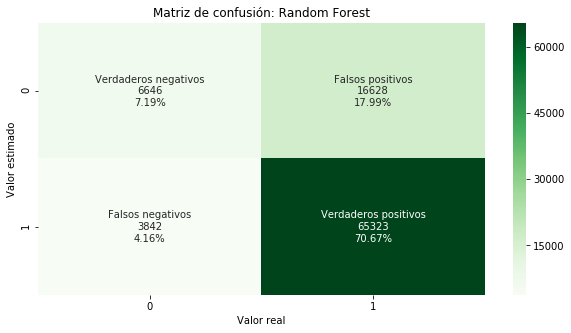

In [36]:
plot_matriz_confusion(random_forest, 'Matriz de confusión: Random Forest')

Accuracy: 77.85%  
AUC: 0.73  
Tasa falsos positivos: 17.99%  

## XGBoost

### Accuracy

In [73]:
accuracy(XGBoost)

0.7881521868475427

### Curva ROC y AUC 

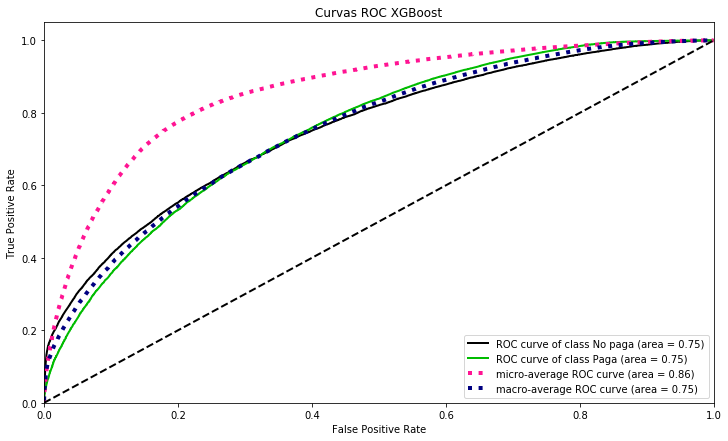

In [42]:
grafico_roc(XGBoost, 'Curvas ROC XGBoost')

### Matriz de confusión normalizada

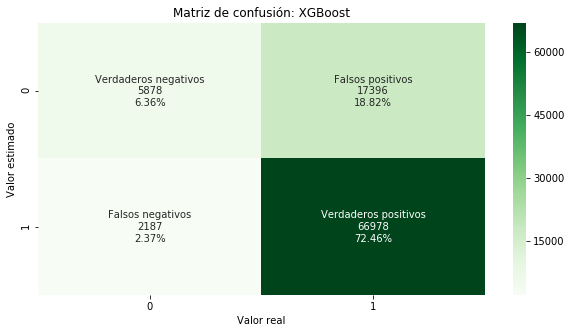

In [43]:
plot_matriz_confusion(XGBoost, 'Matriz de confusión: XGBoost')

Accuracy: 78.81%  
AUC: 0.75  
Tasa falsos positivos: 18.82%  

## Resumen comparativo 

Construimos una tabla con los datos de cada modelo

In [66]:
datos_performance_modelos = {'Modelo': ['Modelo base', 'Regresión logística', 
                                        'SVM: kernel radial', 'SVM: kernel lineal', 
                                         'Random Forest', 'XGBoost'],
                             
                             'Accuracy': ['74.82%', '78.75%', 
                                          '68.46%', '78.67%', 
                                          '77.85%', '78.81%'],
                             
                             'Área bajo la curva ROC': ['0.5', '0.75', 
                                                        '-', '-', 
                                                        '0.73', '0.75'],
                             
                             'Tasa de falsos positivos': ['25.18%', '19.18%', 
                                                          '24.42%' , '20.05%', 
                                                          '17.99%', '18.82%']}

resumen_performance = pd.DataFrame(datos_performance_modelos, columns=['Modelo', 
                                                                       'Accuracy', 
                                                                       'Área bajo la curva ROC',
                                                                       'Tasa de falsos positivos'])

resumen_performance

,Modelo,Accuracy,Área bajo la curva ROC,Tasa de falsos positivos
0,Modelo base,74.82%,0.5,25.18%
1,Regresión logística,78.75%,0.75,19.18%
2,SVM: kernel radial,68.46%,-,24.42%
3,SVM: kernel lineal,78.67%,-,20.05%
4,Random Forest,77.85%,0.73,17.99%
5,XGBoost,78.81%,0.75,18.82%


La decisión del modelo la tomamos en base a las tres métricas de la tabla. Buscamos un modelo suficientemente preciso, con buena área bajo la curva ROC, pero no podemos dejar de lado la tasa de falsos positvios, que es la que queremos minimizar.  

Estamos asociando más coste al falso positivo (individuo al que damos crédito y al final no paga) que al falso negativo (individuo que iba a pagar pero le negamos el crédito). Lo interesante sería contar con datos reales de la compañía que permitiesen cuantificar el coste de cada tipo de error, para construir la matriz de costes a partir de la matriz de confusión.
  
Los mejores modelos en términos de precisión y AUC son la regresión logística y el XGBoost, siendo el XGBoost ligeramente más preciso que la regresión logística. Debido al coste computacional asociado al Boosting, sería necesario pensar bien si esta empresa puede permitirse el XGBoost por la mejora en métricas que va a obtener, puesto que en precisión, la didferencia con la logística es de menos del 0.10%. La regresión logística es un modelo mucho más simple de explicar y de poner en producción, y quizá sea más conveniente para esta empresa.  

Sin embargo la decisión final la tomamos en base a la tasa de falsos positivos, puesto que el XGBoost presenta menor tasa que la logística.  

En síntesis, seleccionamos al XGBoost como modelo ganador, que pasará a la parte de optimización de hiperparámetros. Tras la optimización, se evaluará de nuevo el modelo para ver si la optimización lo ha mejorado, y se analizará e interpretará el modelo.

### Modelo ganador: XGBoost

El modelo seleccionado es el XGBoost. Antes de calcular las métricas del modelo, se procede a la optimización de sus hiperparámetros en el siguiente notebook